In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D2search_results_Election.csv')
df

,user_country,source,content,date
0,United States,Twitter for Android,A report by conservative election strategists...,2020-10-22T23:59:59+00:00
1,Blue Dot in a Red State,Twitter for iPhone,"Like the American Revolution, this election wi...",2020-10-22T23:59:59+00:00
2,NaN,Twitter for iPhone,@LT_FM @realDonaldTrump Perhaps nothing. The...,2020-10-22T23:59:59+00:00
3,A blue house in a red state,Twitter for iPhone,"One of my father's gun-and-knife buddies, not ...",2020-10-22T23:59:58+00:00
4,NaN,Twitter for iPad,Hot take: the longer this Biden scandal goes o...,2020-10-22T23:59:57+00:00
...,...,...,...,...
1995,NaN,Twitter for iPhone,Election interference!!!!!! https://t.co/W5hii...,2020-10-22T23:46:03+00:00
1996,"Lagos, Nigeria",Twitter for Android,@_deyemi Democracy is very complex and require...,2020-10-22T23:46:02+00:00
1997,United States,Twitter for iPad,"There is NO pandemic, but there IS an election...",2020-10-22T23:46:01+00:00
1998,"Brooklyn, NY",Twitter for iPad,'Unprecedented': Voter turnout in election cou...,2020-10-22T23:46:01+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

62603
['a', 'report', 'by', 'conservative', 'election', 'strategists', 'suggests', 'swing', 'voters', 'have', 'turned', 'against', '.', '@realdonaldtrump', 'because', 'of', 'his', 'coronavirus', 'response', ':']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 176.17%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

26240
['report', 'conservative', 'election', 'strategists', 'suggests', 'swing', 'voters', 'turned', 'coronavirus', 'response', 'american', 'revolution', 'election', 'shot', 'heard', 'round', 'world', 'shock', 'world', 'rock']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@realdonaldtrump', 98),
 ('@joebiden', 57),
 ('@lindseygrahamsc', 20),
 ('@thestate', 19),
 ('@postandcourier', 19),
 ('@foxnews', 18),
 ('@twitter', 16),
 ('@jack', 15),
 ('@hankgreen', 14),
 ('@grahamblog', 13),
 ('@potus', 12),
 ('@donaldjtrumpjr', 11),
 ('@youtube', 11),
 ('@cnn', 10),
 ('@kamalaharris', 10),
 ('@johncornyn', 9),
 ('@speakerpelosi', 9),
 ('@johncusack', 8),
 ('@teamtrump', 8),
 ('@cenkuygur', 7)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,United States,Twitter for Android,A report by conservative election strategists...,2020-10-22T23:59:59+00:00,Neutral
1,Blue Dot in a Red State,Twitter for iPhone,"Like the American Revolution, this election wi...",2020-10-22T23:59:59+00:00,Negative
2,NaN,Twitter for iPhone,@LT_FM @realDonaldTrump Perhaps nothing. The...,2020-10-22T23:59:59+00:00,Positive
3,A blue house in a red state,Twitter for iPhone,"One of my father's gun-and-knife buddies, not ...",2020-10-22T23:59:58+00:00,Negative
4,NaN,Twitter for iPad,Hot take: the longer this Biden scandal goes o...,2020-10-22T23:59:57+00:00,Positive
...,...,...,...,...,...
1995,NaN,Twitter for iPhone,Election interference!!!!!! https://t.co/W5hii...,2020-10-22T23:46:03+00:00,Neutral
1996,"Lagos, Nigeria",Twitter for Android,@_deyemi Democracy is very complex and require...,2020-10-22T23:46:02+00:00,Negative
1997,United States,Twitter for iPad,"There is NO pandemic, but there IS an election...",2020-10-22T23:46:01+00:00,Neutral
1998,"Brooklyn, NY",Twitter for iPad,'Unprecedented': Voter turnout in election cou...,2020-10-22T23:46:01+00:00,Positive


In [11]:
df.sentiment.value_counts()

Positive    905
Neutral     634
Negative    461
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 45.25%
Percentage of neutral tweets: 31.70%
Percentage of negative tweets: 23.05%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

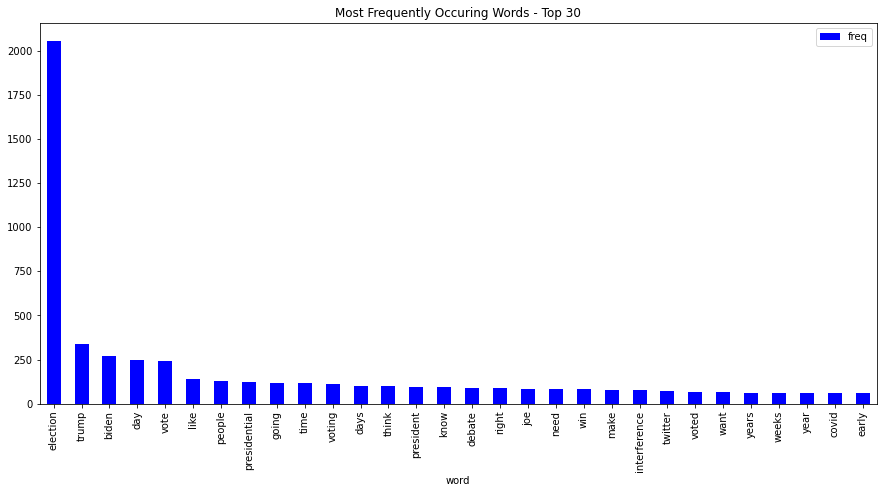

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Election Debate1')

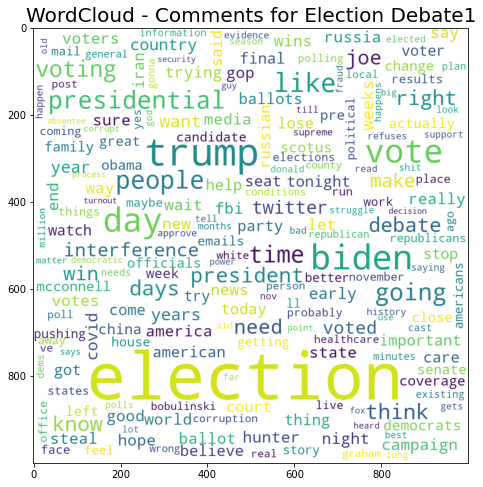

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Election Debate1", fontsize = 20)

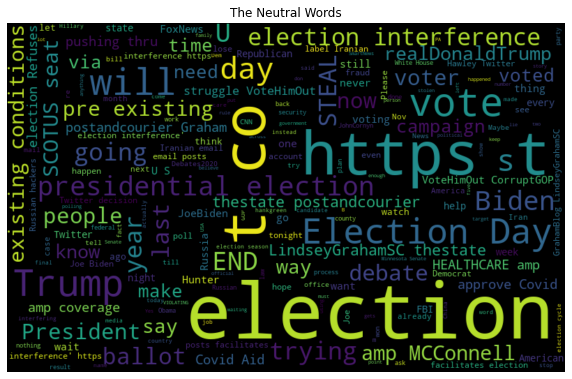

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

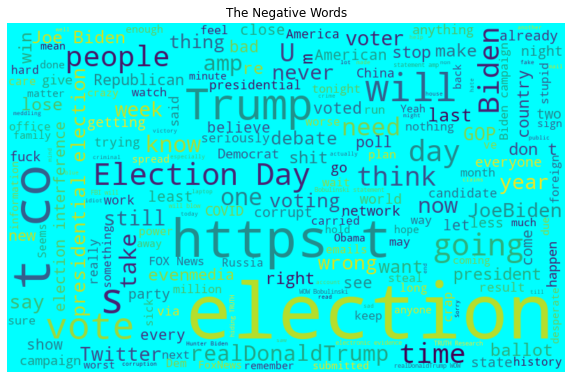

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

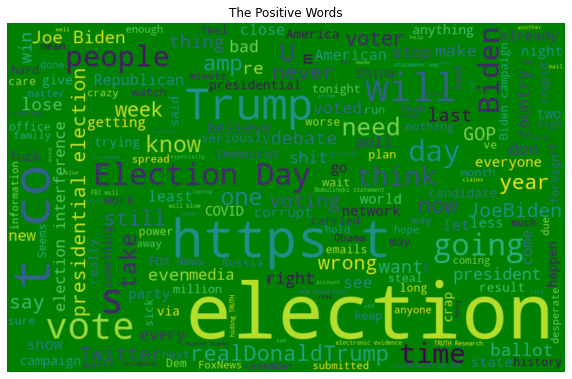

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,A report by conservative election strategists...,Neutral
1,"Like the American Revolution, this election wi...",Negative
2,@LT_FM @realDonaldTrump Perhaps nothing. The...,Positive
3,"One of my father's gun-and-knife buddies, not ...",Negative
4,Hot take: the longer this Biden scandal goes o...,Positive
...,...,...
1995,Election interference!!!!!! https://t.co/W5hii...,Neutral
1996,@_deyemi Democracy is very complex and require...,Negative
1997,"There is NO pandemic, but there IS an election...",Neutral
1998,'Unprecedented': Voter turnout in election cou...,Positive


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Neutral,a report by conservative election strategists ...
1,Negative,like the american revolution this election wil...
2,Positive,fm perhaps nothing there is only one way to pr...
3,Negative,one of my father s gun and knife buddies not k...
4,Positive,hot take the longer this biden scandal goes on...
...,...,...
1995,Neutral,election interference
1996,Negative,deyemi democracy is very complex and requires ...
1997,Neutral,there is no pandemic but there is an election ...
1998,Positive,unprecedented voter turnout in election could ...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
2,Positive,fm perhaps nothing there is only one way to pr...
4,Positive,hot take the longer this biden scandal goes on...
5,Positive,people actually have a problem with this he po...
12,Positive,i think i the best case scenario for the count...
15,Positive,texas is the biggest state in this election to...
...,...,...
1970,Negative,doesn t mean anything they thought they were g...
1977,Negative,you re so naive to know that this is by design...
1988,Negative,our election is a climatereferendum we have a ...
1989,Negative,oh yeah whatever happened w that i was just re...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
2,1,fm perhaps nothing there is only one way to pr...
4,1,hot take the longer this biden scandal goes on...
5,1,people actually have a problem with this he po...
12,1,i think i the best case scenario for the count...
15,1,texas is the biggest state in this election to...
...,...,...
1970,0,doesn t mean anything they thought they were g...
1977,0,you re so naive to know that this is by design...
1988,0,our election is a climatereferendum we have a ...
1989,0,oh yeah whatever happened w that i was just re...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(1024, 2)
(342, 2)


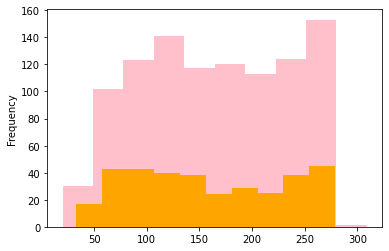

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(403143, 626040)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('tosaveamerica', 0.7229724526405334),
 ('trumpispathetic', 0.721274197101593),
 ('easily', 0.7042688131332397),
 ('charges', 0.702776312828064),
 ('j', 0.6956722140312195),
 ('instagram', 0.6906853318214417),
 ('presidency', 0.689427375793457),
 ('rival', 0.6842594146728516),
 ('discussing', 0.6832515597343445),
 ('follow', 0.6827548742294312)]

In [37]:
model_w2v.wv.most_similar(negative = "trum")

[('now', -0.24301639199256897),
 ('after', -0.27004170417785645),
 ('country', -0.28292202949523926),
 ('rd', -0.3170575499534607),
 ('world', -0.3176625072956085),
 ('november', -0.33078885078430176),
 ('went', -0.3331190347671509),
 ('at', -0.33421140909194946),
 ('we', -0.3365142047405243),
 ('blow', -0.33765679597854614)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(1024, 500)
(1024,)
(342, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.5
F1 score : 0.5670886075949367
[[ 59  57]
 [114 112]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9990234375
Validation Accuracy : 0.5526315789473685
f1 score : 0.6652078774617068
[[ 37  79]
 [ 74 152]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.49707602339181284
f1 score : 0.5567010309278351
[[ 62  54]
 [118 108]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9423828125
Validation Accuracy : 0.6578947368421053
f1 score : 0.7899461400359067
[[  5 111]
 [  6 220]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 kaboom thanks for the election tony bobulinski 

First sample after preprocessing: 
 [ 13   1   2 254   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
8/8 - 2s - loss: 0.6597 - accuracy: 0.6211 - val_loss: 0.6284 - val_accuracy: 0.6796
Epoch 2/20
8/8 - 2s - loss: 0.6448 - accuracy: 0.6612 - val_loss: 0.6278 - val_accuracy: 0.6796
Epoch 3/20
8/8 - 2s - loss: 0.6388 - accuracy: 0.6612 - val_loss: 0.6331 - val_accuracy: 0.6796
Epoch 4/20
8/8 - 2s - loss: 0.6335 - accuracy: 0.6612 - val_loss: 0.6249 - val_accuracy: 0.6796
Epoch 5/20
8/8 - 2s - loss: 0.6287 - accuracy: 0.6612 - val_loss: 0.6173 - val_accuracy: 0.6796
Epoch 6/20
8/8 - 2s - loss: 0.6197 - accuracy: 0.6612 - val_loss: 0.6084 - val_accuracy: 0.6796
Epoch 7/20
8/8 - 2s - loss: 0.6030 - accuracy: 0.6612 - val_loss: 0.5880 - val_accuracy: 0.6796
Epoch 8/20
8/8 - 2s - loss: 0.5781 - accuracy: 0.6612 - val_loss: 0.5597 - val_accuracy: 0.6796
Epoch 9/20
8/8 - 2s - loss: 0.5383 - accuracy: 0.6612 - val_loss: 0.5294 - val_accuracy: 0.7282
Epoch 10/20
8/8 - 2s - loss: 0.4912 - accuracy: 0.7372 - val_loss: 0.5028 - val_accuracy: 0.7573
Epoch 11/20
8/8 - 2s - loss: 0.4404 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,-1,a report by conservative election strategists ...
1,0,like the american revolution this election wil...
2,1,fm perhaps nothing there is only one way to pr...
3,0,one of my father s gun and knife buddies not k...
4,1,hot take the longer this biden scandal goes on...
...,...,...
1995,-1,election interference
1996,0,deyemi democracy is very complex and requires ...
1997,-1,there is no pandemic but there is an election ...
1998,1,unprecedented voter turnout in election could ...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.9993333333333333
Validation Accuracy : 0.458
F1 score : [0.48120301 0.21794872 0.52134831]
[[ 96   8  50]
 [ 50  17  38]
 [ 99  26 116]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9133333333333333
Validation Accuracy : 0.416
f1 score : [0.48058252 0.24271845 0.43979058]
[[ 99  24  31]
 [ 54  25  26]
 [105  52  84]]


C:\Users\anshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9993333333333333
Validation Accuracy : 0.392
f1 score : [0.43569554 0.2893617  0.41145833]
[[83 29 42]
 [49 34 22]
 [95 67 79]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.852
Validation Accuracy : 0.52
f1 score : [0.51041667 0.01869159 0.63261297]
[[ 98   1  55]
 [ 52   1  52]
 [ 80   0 161]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['dr bonnie henry allowed horgan to leave the impression that she was ok with his decision to call an election now and i would have been very surprised had she cracked down on weddings and in surrey at this point in the campaign bcpoli', 'hawley twitter s decision to not label iranian email posts facilitates election interference', 'amid fears of election day chaos one county prepares for anxious days after the vote', 'can we please not do this this is almost criminal before the election', 'que ms ll woo woo hooting all the way into election day with the coolest of cool thank you tony voteredtosaveamerica bestpresidentever', 'election interference by twitter again this monster needs to be broken into a million pieces', 'i can t wait for this election season to just go', 'steve mnuchin announces sanctions on iran over election interference via', 'she s been a judge years and has some horrific rulings garland had been a judge for many times longer and

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 3s - loss: 0.5338 - accuracy: 0.2333 - val_loss: 0.4062 - val_accuracy: 0.3000
Epoch 2/20
11/11 - 3s - loss: 0.3865 - accuracy: 0.2304 - val_loss: 0.3803 - val_accuracy: 0.3000
Epoch 3/20
11/11 - 3s - loss: 0.3648 - accuracy: 0.2304 - val_loss: 0.3968 - val_accuracy: 0.3000
Epoch 4/20
11/11 - 3s - loss: 0.3506 - accuracy: 0.2304 - val_loss: 0.3699 - val_accuracy: 0.3000
Epoch 5/20
11/11 - 3s - loss: 0.3056 - accuracy: 0.2304 - val_loss: 0.3407 - val_accuracy: 0.3000
Epoch 6/20
11/11 - 3s - loss: 0.1998 - accuracy: 0.2304 - val_loss: 0.2611 - val_accuracy: 0.3000
Epoch 7/20
11/11 - 3s - loss: -9.1162e-02 - accuracy: 0.2304 - val_loss: 0.0771 - val_accuracy: 0.3000
Epoch 8/20
11/11 - 3s - loss: -8.4517e-01 - accuracy: 0.2422 - val_loss: -3.2266e-01 - val_accuracy: 0.3467
Epoch 9/20
11/11 - 3s - loss: -2.7081e+00 - accuracy: 0.3111 - val_loss: -1.2725e+00 - val_accuracy: 0.3400
Epoch 10/20
11/11 - 3s - loss: -6.8995e+00 - accuracy: 0.3444 - val_loss: -3.0002e+00 - val_a